<a href="https://colab.research.google.com/github/domon59/ML/blob/master/Top50%20Spotify%20Song.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor


In [23]:
spot_df = pd.read_csv('/content/top50.csv', encoding='ISO-8859-1')
spot_df.head()


,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [24]:
spot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [25]:
spot_df.rename(columns={'Track.Name':'Track_Name','Artist.Name':'Artist_Name','Beats.Per.Minute':'Beats_per_minute','Loudness..dB..':'Loudness','Valence.':'Valence','Length.':'Length',
                        'Acousticness..':'Acousticness','Speechiness.':'Speechiness'}, inplace=True)

In [26]:
spot_df = spot_df.drop(['Unnamed: 0'], axis =1)

In [27]:
spot_df.nunique()

Track_Name          50
Artist_Name         38
Genre               21
Beats_per_minute    31
Energy              31
Danceability        29
Loudness             9
Liveness            22
Valence             39
Length              44
Acousticness        35
Speechiness         24
Popularity          18
dtype: int64

In [28]:
#show the 3 digital 
pd.set_option('precision',3)
spot_df.describe()

,Beats_per_minute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.000,50.000,50.00,50.000,50.000,50.000,50.000,50.000,50.000,50.000
mean,120.060,64.060,71.38,-5.660,14.660,54.600,200.960,22.160,12.480,87.500
std,30.898,14.232,11.93,2.056,11.118,22.336,39.144,18.996,11.162,4.491
min,85.000,32.000,29.00,-11.000,5.000,10.000,115.000,1.000,3.000,70.000
25%,96.000,55.250,67.00,-6.750,8.000,38.250,176.750,8.250,5.000,86.000
50%,104.500,66.500,73.50,-6.000,11.000,55.500,198.000,15.000,7.000,88.000
75%,137.500,74.750,79.75,-4.000,15.750,69.500,217.500,33.750,15.000,90.750
max,190.000,88.000,90.00,-2.000,58.000,95.000,309.000,75.000,46.000,95.000


In [29]:
# Check data distribution using skewness
skew=spot_df.skew()
print(skew)

Beats_per_minute    0.855
Energy             -0.453
Danceability       -1.380
Loudness           -0.832
Liveness            2.204
Valence            -0.046
Length              0.749
Acousticness        1.135
Speechiness         1.378
Popularity         -1.503
dtype: float64


In [40]:
#Liveness has the highest skewness, transform it using boxcox
transform = np.asarray(spot_df['Liveness'].values)
print(transform.shape)
transform_df = stats.boxcox(transform)[0]


(50,)


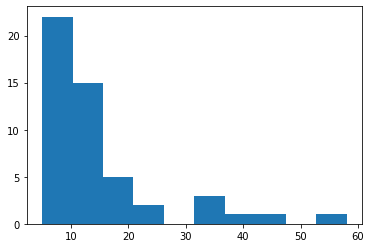

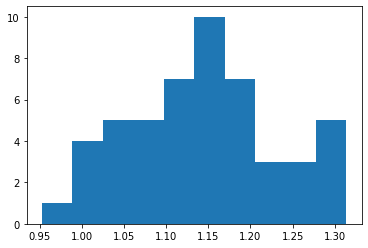

In [41]:
#plot boxcox comparison
plt.hist(spot_df['Liveness'],bins=10) # original data
plt.show()
plt.hist(transform_df,bins=10) #after transform
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


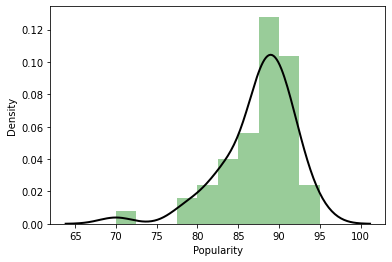

In [47]:

sns.distplot(spot_df['Popularity'], bins = 10, kde=True, kde_kws={'color':'k','lw':2, 'label':'KDE'}, color ='green')  #original data
plt.show()


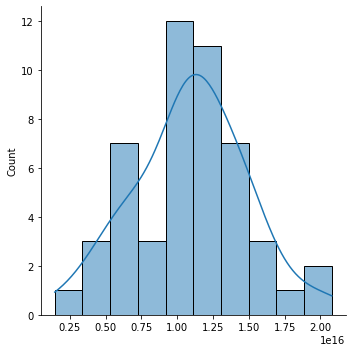

In [64]:
popu_transform = spot_df['Popularity']
popu_transform_df=stats.boxcox(popu_transform)[0]
sns.displot(popu_transform_df, bins = 10,kde=True) # after transformation
plt.show()


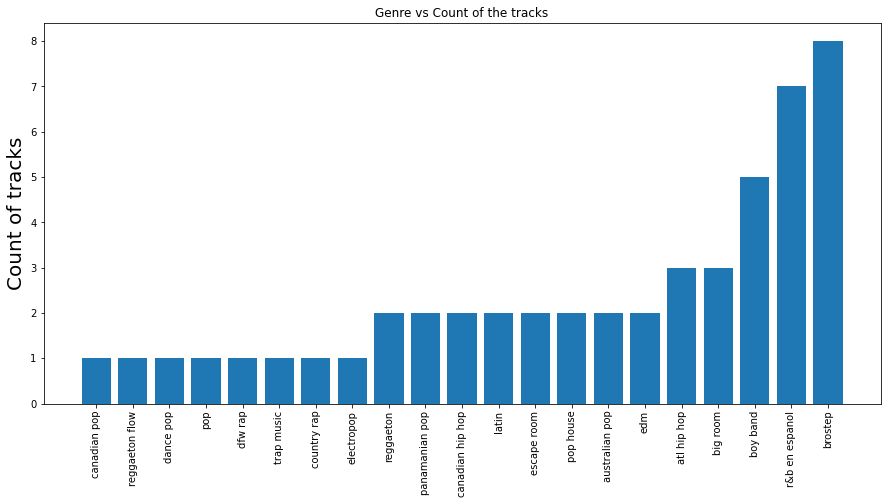

In [92]:
genre_list = spot_df['Genre'].unique()
genre_len = np.arange(len(genre_list))
genre_groupby = spot_df.groupby('Genre')['Track_Name'].agg(len).sort_values(ascending=True)
plt.figure(figsize=(15,7))
plt.bar(genre_len,genre_groupby)
plt.xticks(genre_len,genre_list,rotation=90)
plt.ylabel('Count of tracks', fontsize=20)
plt.title('Genre vs Count of the tracks')
plt.show()

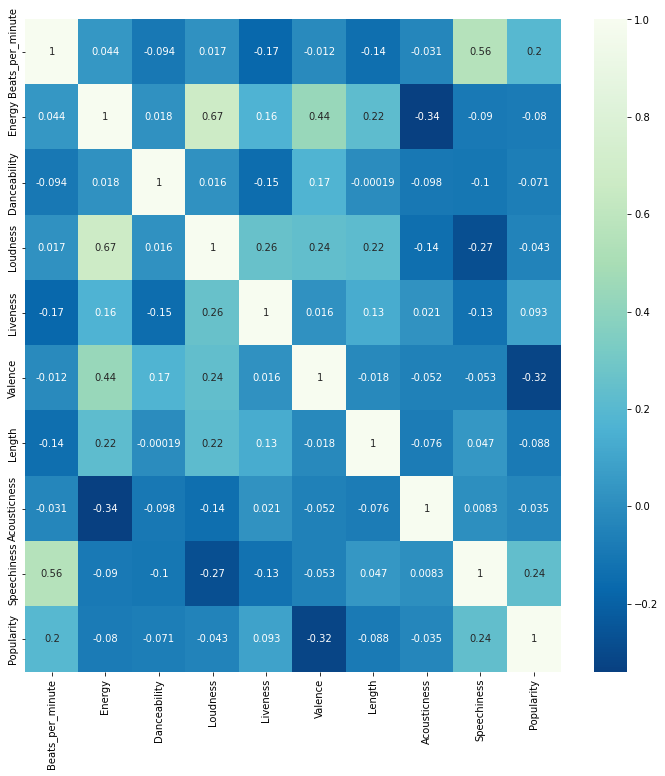

In [99]:
# Correlation 
plt.figure(figsize=(12,12))
sns.heatmap(spot_df.corr(), annot=True, cmap= 'GnBu_r')


In [105]:
target_index =spot_df.corr().Popularity.reset_index()
#print(target_index)
target_cols=target_index.loc[(target_index.iloc[:,1]< 0.95) & (target_index.iloc[:,1]>0.05), :]
print(target_cols)

              index  Popularity
0  Beats_per_minute       0.196
4          Liveness       0.093
8       Speechiness       0.239


Text(0, 0.5, 'Count of songs')

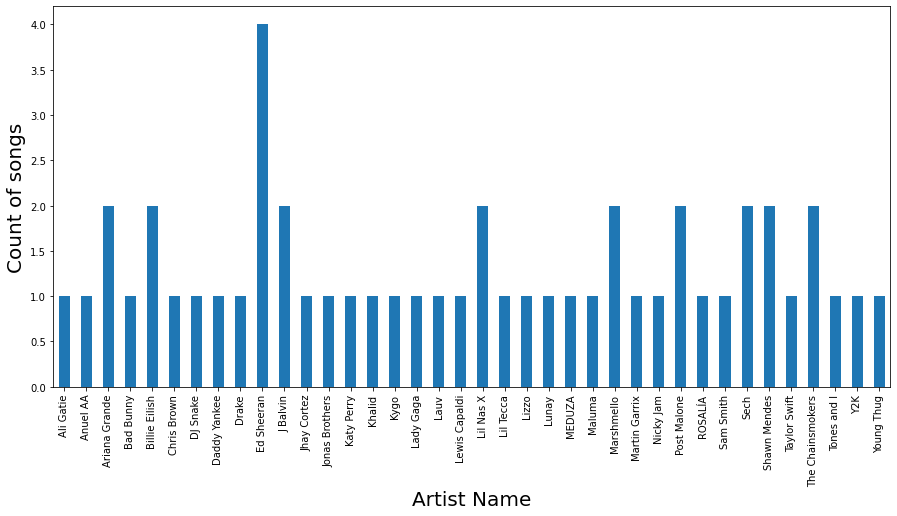

In [106]:
fig = plt.figure(figsize=(15,7))
spot_df.groupby('Artist_Name')['Track_Name'].agg(len).plot(kind='bar')
plt.xlabel('Artist Name', fontsize =20)
plt.ylabel('Count of songs',fontsize=20)

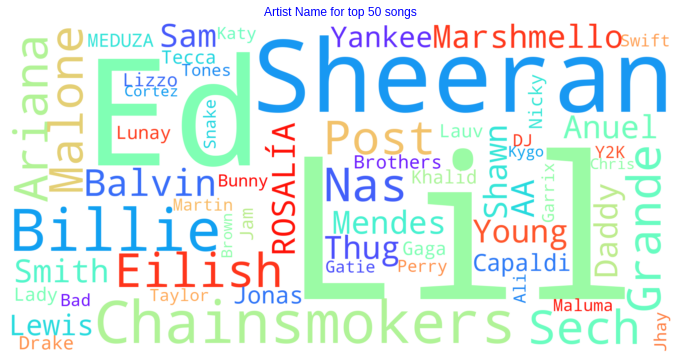

In [110]:
#Word Cloud
from wordcloud import WordCloud
plt.style.use('seaborn')
wrds1 = spot_df["Artist_Name"].str.split("(").str[0].value_counts().keys()

wc1 = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="white").generate(" ".join(wrds1))
plt.figure(figsize=(12,18))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Artist Name for top 50 songs ",color='b')
plt.show()

In [116]:
#Modeling
x=spot_df.select_dtypes(exclude='object')
y=x.pop('Popularity')

In [117]:
X_train,X_val,y_train,y_val = train_test_split(x,y, test_size=0.6)

In [120]:
def calculateModel(real, prediction):
  rmse = np.sqrt(mean_squared_error(real,prediction))
  r2 = r2_score(real, prediction)
  print('rmse', rmse)
  print('r2 score', r2)

In [123]:
rg =LinearRegression().fit(X_train,y_train)
pred = rg.predict(X_val)
calculateModel(y_val,pred)



rmse 8.577078900702709
r2 score -2.8981250645859076


In [130]:
#According to corr to select columns
x=spot_df[['Beats_per_minute','Liveness','Speechiness']]
y=spot_df['Popularity']
regressor=LinearRegression()
X_train,X_val,y_train,y_val=train_test_split(x,y,test_size=0.6)
y_pred = regressor.fit(X_train,y_train).predict(X_val)
mse=cross_val_score(regressor,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mse_mean=np.mean(mse)
print(mse_mean)
diff=metrics.mean_squared_error(y_val, y_pred)-abs(mse_mean)
print(diff)

-20.365404270236034
3.3452696792135654


In [132]:
spot_df.dtypes

Track_Name          object
Artist_Name         object
Genre               object
Beats_per_minute     int64
Energy               int64
Danceability         int64
Loudness             int64
Liveness             int64
Valence              int64
Length               int64
Acousticness         int64
Speechiness          int64
Popularity           int64
dtype: object

In [143]:

labelencoder = LabelEncoder()
train_df=spot_df.copy()
train_df['Genre']=labelencoder.fit_transform(train_df['Genre'])
train_df.head()
train_df.drop(['Track_Name','Artist_Name','Beats_per_minute','Liveness','Speechiness'], axis =1, inplace=True)

In [144]:
train_df.head()

,Genre,Energy,Danceability,Loudness,Valence,Length,Acousticness,Popularity
0,6,55,76,-6,75,191,4,79
1,19,81,79,-4,61,302,8,92
2,8,80,40,-4,70,186,12,85
3,15,65,64,-8,55,198,12,86
4,9,65,58,-4,18,175,45,94


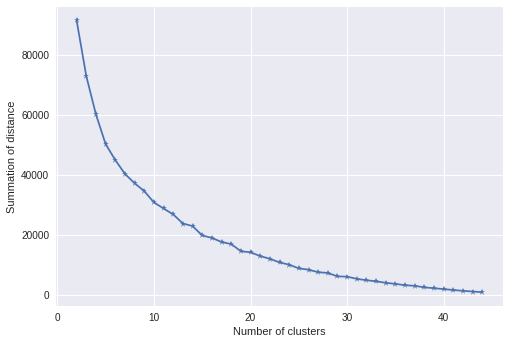

In [149]:
#Use KMeans to classify the data
kmeans_dis=list()
for idx in range(2, 45):
  kmeans = KMeans(n_clusters=idx, n_init=20)
  kmeans.fit_transform(train_df.iloc[:])
  kmeans_dis.append(kmeans.inertia_)

plt.plot(list(range(2,45)), kmeans_dis, marker='*')
plt.xlabel('Number of clusters')
plt.ylabel('Summation of distance')

plt.show()


In [150]:
#find elbow point = 16
kmeans = KMeans(n_init=20, n_clusters=16)
kmeans.fit_transform(train_df.iloc[:])
kmeans_label =kmeans.labels_
train_df['classification']=kmeans_label
train_df.head()


,Genre,Energy,Danceability,Loudness,Valence,Length,Acousticness,Popularity,classification
0,6,55,76,-6,75,191,4,79,15
1,19,81,79,-4,61,302,8,92,4
2,8,80,40,-4,70,186,12,85,2
3,15,65,64,-8,55,198,12,86,2
4,9,65,58,-4,18,175,45,94,1


In [152]:
y = train_df.pop('Popularity')
X_train, X_val,y_train,y_val = train_test_split(train_df,y, train_size=0.6)
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)
rf_pred = rf.predict(X_val)
calculateModel(y_val,rf_pred)

rmse 3.9355107673591747
r2 score 0.11998607954545448
